词向量的用途
- 主题聚类
- 情感分析
- 信息检索

word2vec的缺点:
- 没有考虑同义词
- 窗口长度有限
- 没有考虑全局的文本信息
- 不是严格意义上的语序

In [1]:
!pip install gensim -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib

### 分词

In [ ]:
""就“”

In [3]:
f = open('../data/sanguo.txt', 'r', encoding='utf-8')
lines = []
for line in f:
    temp = jieba.lcut(line)
    words = []
    for i in temp:
        # 过滤标点符合
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'“”《》]+|[+--！，。？、~@……#￥&*（）：；‘]+", "", i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[0:5])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\SUPERC~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.666 seconds.
Prefix dict has been built successfully.
D:\.venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Possible set difference at position 29
  


[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['调寄', '临江仙']]


### 模型训练

In [17]:
# 创建模型的时候就会进行训练. 
model = Word2Vec(lines, vector_size=20, window=2, min_count=3, epochs=10, sg=1, negative=10)

In [18]:
# 获取某个词的词向量
print('孔明的词向量: \n', model.wv.get_vector('孔明'))

孔明的词向量: 
 [ 0.22932006 -0.31401926 -0.3361448   0.5259256   0.64111793 -1.1902252
  0.8145919   1.0720093   0.12070533  0.57198864  0.8203105   0.0775066
 -0.01300235 -0.9294619   0.25386158  0.7780887   0.24258076  0.26998928
 -0.0894358  -0.70856553]


In [19]:
# 查找和刘备最相似的前n个词
model.wv.most_similar('孔明', topn=10)

[('庞统', 0.8881941437721252),
 ('孙夫人', 0.8793833255767822),
 ('门吏', 0.8730310201644897),
 ('二嫂', 0.8711876273155212),
 ('鲁肃入', 0.8643801808357239),
 ('关公', 0.8609877228736877),
 ('孔明入', 0.8581329584121704),
 ('一遍', 0.8574054837226868),
 ('玄德', 0.8508473634719849),
 ('良久', 0.8496859073638916)]

### 可视化

In [20]:
model.wv.index_to_key

['曰',
 '之',
 '也',
 '吾',
 '与',
 '而',
 '将',
 '了',
 '有',
 '在',
 '为',
 '来',
 '不',
 '我',
 '去',
 '又',
 '皆',
 '于',
 '人',
 '曹操',
 '乃',
 '见',
 '矣',
 '孔明',
 '遂',
 '是',
 '将军',
 '等',
 '今',
 '操',
 '中',
 '至',
 '欲',
 '却说',
 '此',
 '到',
 '便',
 '玄德',
 '兵',
 '得',
 '从',
 '被',
 '杀',
 '汝',
 '已',
 '可',
 '上',
 '问',
 '走',
 '出',
 '关公',
 '言',
 '丞相',
 '亦',
 '若',
 '以',
 '令',
 '二人',
 '蜀',
 '使',
 '不可',
 '荆州',
 '下',
 '却',
 '后',
 '寨',
 '张',
 '只',
 '玄德曰',
 '孔明曰',
 '死',
 '时',
 '不能',
 '其',
 '如此',
 '无',
 '军',
 '斩',
 '张飞',
 '请',
 '说',
 '一',
 '且',
 '商议',
 '并',
 '如何',
 '回',
 '主公',
 '他',
 '军士',
 '听',
 '事',
 '吕布',
 '左右',
 '军马',
 '就',
 '即',
 '者',
 '赵云',
 '刘备',
 '瑜',
 '引兵',
 '引',
 '次日',
 '二',
 '大喜',
 '云长',
 '孙权',
 '诸',
 '正',
 '则',
 '前',
 '你',
 '看',
 '往',
 '所',
 '耳',
 '更',
 '天下',
 '郃',
 '耶',
 '东吴',
 '于是',
 '退',
 '起',
 '众',
 '大',
 '今日',
 '懿',
 '不敢',
 '望',
 '魏兵',
 '日',
 '自',
 '毕',
 '臣',
 '陛下',
 '都督',
 '尽',
 '司马懿',
 '一人',
 '人马',
 '不知',
 '周瑜',
 '城',
 '马',
 '汉中',
 '当',
 '但',
 '都',
 '众将',
 '只见',
 '取',
 '如',
 '帐',
 '待',
 '还',
 '未',
 '后主

In [21]:
raw_wordvec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key):
    raw_wordvec.append(model.wv[w]) # 每个词的词向量
    word2ind[w] = i # 每个词的索引
raw_wordvec = np.array(raw_wordvec)
X_reduced = PCA(n_components=2).fit_transform(raw_wordvec)

In [22]:
X_reduced

array([[-1.1951632 ,  0.39409268],
       [-0.7634324 ,  0.17508443],
       [-1.0220596 ,  0.1258393 ],
       ...,
       [-0.3798929 , -0.08565775],
       [ 0.20349576, -0.06799599],
       [ 0.3813598 , -0.22326028]], dtype=float32)

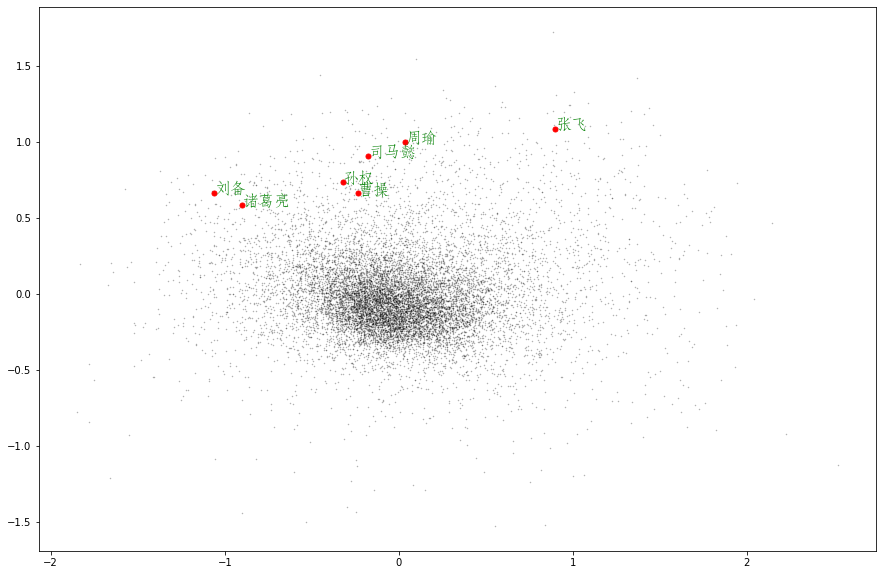

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize=1, alpha=0.3, color='black')

# 随便绘制几个文章中常见的词. 
words = ['孙权', '刘备', '曹操', '周瑜', '诸葛亮', '司马懿', '张飞']
# 设置中文字体
font = matplotlib.font_manager.FontProperties(fname='../data/华文仿宋.ttf', size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha=1, color='red', markersize=10)
        plt.text(xy[0], xy[1], w, fontproperties=font, alpha=1, color='green')